<a href="https://colab.research.google.com/github/vard-uhi-ns/MUTT/blob/master/sales_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/task/sales_forcast.csv")

In [ ]:
data.head(2)

,Month,Sales,Promotions,Average_Price,Economic_Index
0,January 2019,80238.92,0,18.54,95.55
1,February 2019,75675.76,0,20.43,95.92


In [ ]:
data.shape

(60, 5)

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

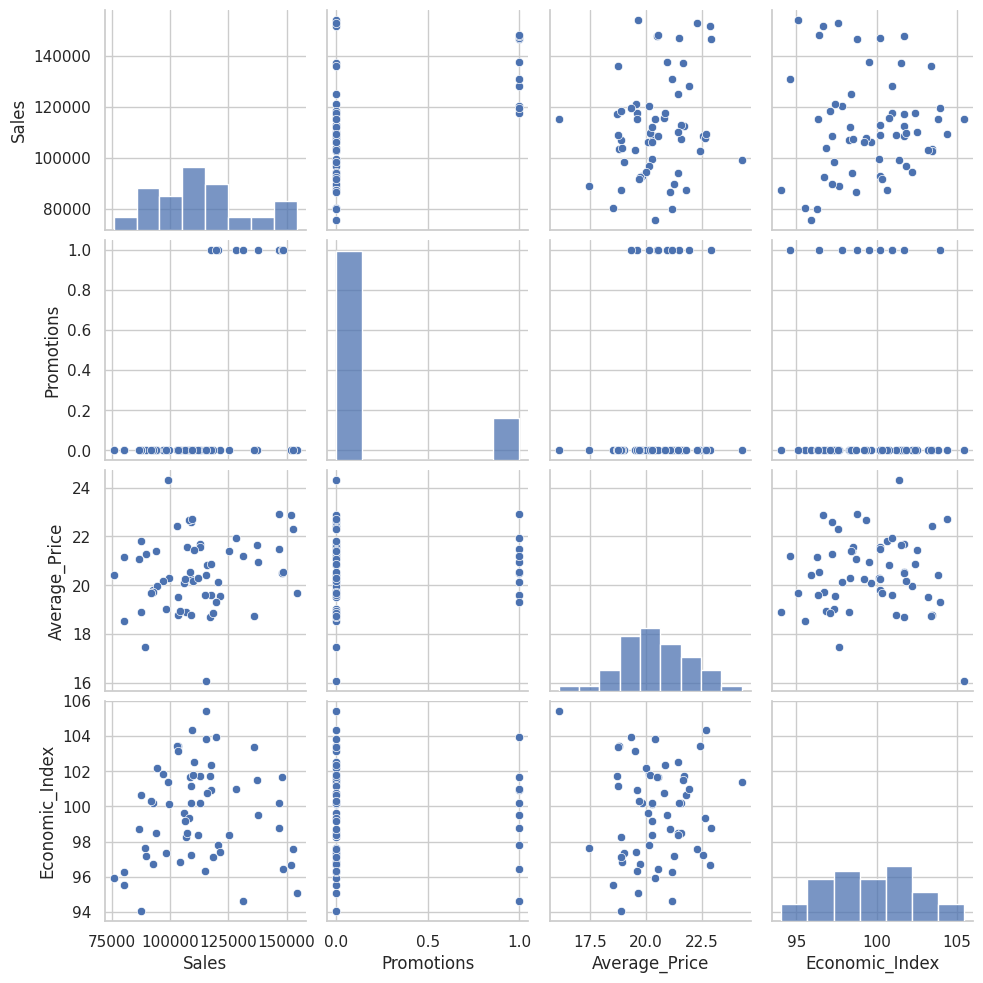

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a pairplot to observe pairwise relationships
sns.pairplot(data)
plt.show()

In [ ]:
# ========== 1. Sales Trend Over Time ==========
fig_sales_trend = px.line(data, x=data.index, y='Sales',
                          title='Sales Trend Over Time')
fig_sales_trend.update_layout(xaxis_title='Month', yaxis_title='Sales (USD)')
fig_sales_trend.show()


Sales Trend Over Time (Line Plot):

This plot shows a clear upward trend in sales over the period from January 2019 to December 2023.
There are noticeable spikes, which could be linked to promotional events or seasonal demand.
The increasing trend suggests growing market penetration or improved customer engagement over time.

In [ ]:
# ========== 2. Monthly Sales Seasonality ==========
data['Month_Num'] = data.index.month
fig_seasonality = px.box(data, x='Month_Num', y='Sales',
                         title='Monthly Sales Seasonality')
fig_seasonality.update_layout(xaxis_title='Month', yaxis_title='Sales (USD)')
fig_seasonality.show()


AttributeError: 'RangeIndex' object has no attribute 'month'

In [ ]:
# ========== 3. Effect of Promotions on Sales ==========
fig_promotions = px.box(data, x='Promotions', y='Sales',
                        title='Effect of Promotions on Sales')
fig_promotions.update_layout(xaxis_title='Promotions (0 = No, 1 = Yes)',
                             yaxis_title='Sales (USD)')
fig_promotions.show()

In [ ]:
# ========== 4. Correlation Heatmap ==========
import numpy as np
corr = data.corr()

fig_corr = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='coolwarm',
    zmin=-1, zmax=1))
fig_corr.update_layout(title="Correlation Heatmap")
fig_corr.show()

ValueError: could not convert string to float: 'January 2019'

In [ ]:
# ========== 5. Distribution of Sales ==========
fig_sales_dist = px.histogram(data, x="Sales", nbins=20,
                              title="Distribution of Sales", marginal="box")
fig_sales_dist.show()

In [ ]:
# ========== 6. Distribution of Average Price ==========
fig_price_dist = px.histogram(data, x="Average_Price", nbins=20,
                              title="Distribution of Average Price", marginal="box")
fig_price_dist.show()

In [ ]:
# ========== 7. Distribution of Economic Index ==========
fig_econ_dist = px.histogram(data, x="Economic_Index", nbins=20,
                             title="Distribution of Economic Index", marginal="box")
fig_econ_dist.show()

In [ ]:
# ========== 8. Sales vs. Average Price ==========
fig_scatter_price = px.scatter(data, x='Average_Price', y='Sales',
                               color='Promotions',
                               title='Sales vs. Average Price (Colored by Promotion)')
fig_scatter_price.show()

In [ ]:
# ========== 9. Sales vs. Economic Index ==========
fig_scatter_econ = px.scatter(data, x='Economic_Index', y='Sales',
                              color='Promotions',
                              title='Sales vs. Economic Index (Colored by Promotion)')
fig_scatter_econ.show()

In [ ]:
data.head(2)

,Month,Sales,Promotions,Average_Price,Economic_Index
0,January 2019,80238.92,0,18.54,95.55
1,February 2019,75675.76,0,20.43,95.92


In [ ]:
# Define features and target
X = data[['Promotions', 'Average_Price', 'Economic_Index']]
y = data['Sales']

In [ ]:
from xgboost import XGBRegressor

# Re-train the XGBoost model on the full dataset for future forecasting
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X, y)

# Create future exogenous features for the next 12 months
future_dates = pd.date_range(start=data_ml.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Create lagged features for future periods using the last known values
future_data = pd.DataFrame(index=future_dates)

# Set month and year values
future_data['Month_Num'] = future_data.index.month
future_data['Year'] = future_data.index.year

# Use the last known exogenous variable values
future_data['Promotions'] = data_ml['Promotions'].iloc[-12:].mean()
future_data['Average_Price'] = data_ml['Average_Price'].iloc[-12:].mean()
future_data['Economic_Index'] = data_ml['Economic_Index'].iloc[-12:].mean()

# Create lagged sales features using the last known data
for lag in range(1, 13):
    future_data[f"Sales_Lag_{lag}"] = data_ml['Sales'].iloc[-lag]

# Predict future sales using the trained model
future_sales = xgb_model.predict(future_data)

# Create a DataFrame for the forecast
forecast = pd.DataFrame({'Month': future_dates, 'Forecasted_Sales': future_sales})
forecast.set_index('Month', inplace=True)

# Plot the forecast along with historical sales
plt.figure(figsize=(12, 6))
plt.plot(data_ml.index, data_ml['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast.index, forecast['Forecasted_Sales'], label='Forecasted Sales', color='red')
plt.title('12-Month Sales Forecast (XGBoost)')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
forecast


NameError: name 'data_ml' is not defined